In [26]:
%matplotlib inline  
from struct import unpack
from numpy import zeros, uint8, float32
from pylab import imshow, show, cm
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# Define functions for reading data.
# Based on https://gist.github.com/tylerneylon/
def read_idx(filename):
    """
        Read from file and create numpy array
    """
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

def get_data(image_file, label_file):
    """
        Read the image and label data
    """
    # Read the files
    pre_images = read_idx(image_file)
    labels = read_idx(label_file)
    
    images = np.zeros((len(pre_images), 28,28), dtype=np.float32)
    for i in range(len(pre_images)):
        pre_img=pre_images[i]
        img = (pre_img.transpose() / 255.0)
        images[i] = img
    return images, labels


In [64]:
image_file = '/Users/rparundekar/dataspace/EMNIST/mnist/emnist-mnist-train-images-idx3-ubyte'
label_file = '/Users/rparundekar/dataspace/EMNIST/mnist/emnist-mnist-train-labels-idx1-ubyte'

images, labels = get_data(image_file, label_file)
print ('Images Shape: {}'.format(images.shape))
print ('Labels Shape: {}'.format(labels.shape))

Images Shape: (60000, 784)
Labels Shape: (60000,)


Label: 4


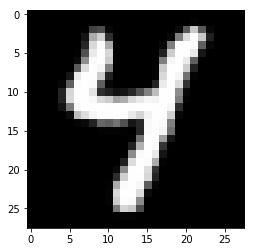

Label: 1


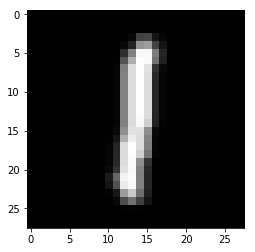

Label: 4


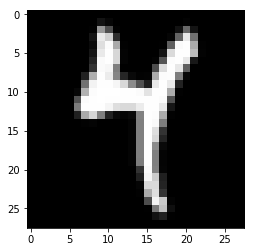

Label: 1


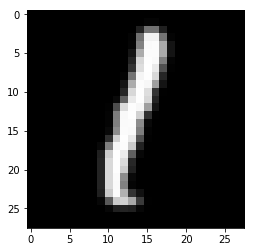

Label: 6


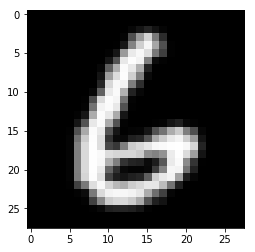

Label: 7


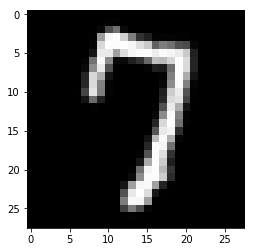

Label: 6


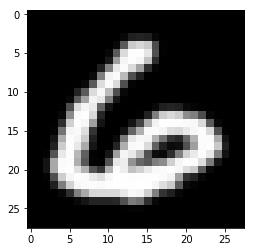

Label: 8


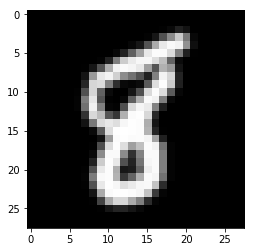

Label: 0


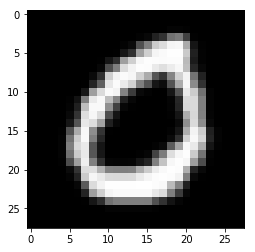

Label: 9


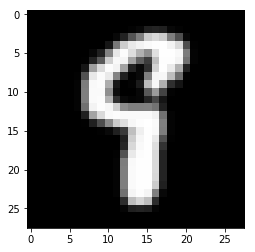

In [68]:
def view_image(image, label=""):
    """View a single image."""
    print("Label: %s" % label)
    plt.imshow(image, cmap="gray")
    plt.show()

for i in range(5):
    view_image(images[i], labels[i])